In [1]:
import pandas as pd

df = pd.read_csv('D:/HAFSA Workspace/weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


Performing EDA

Separating categorical and numerical columns

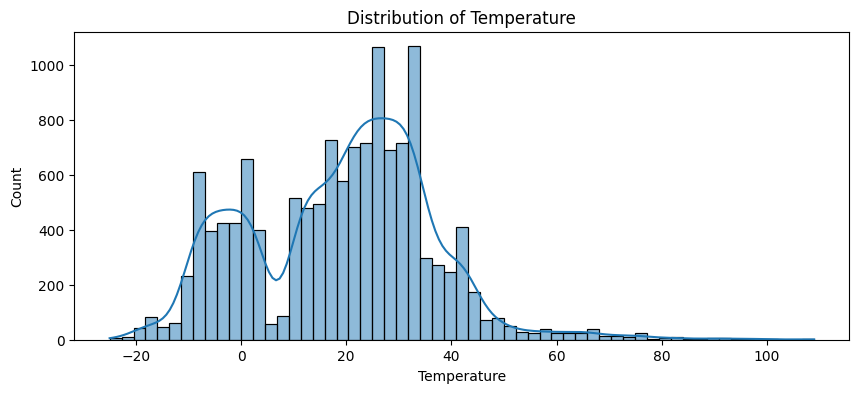

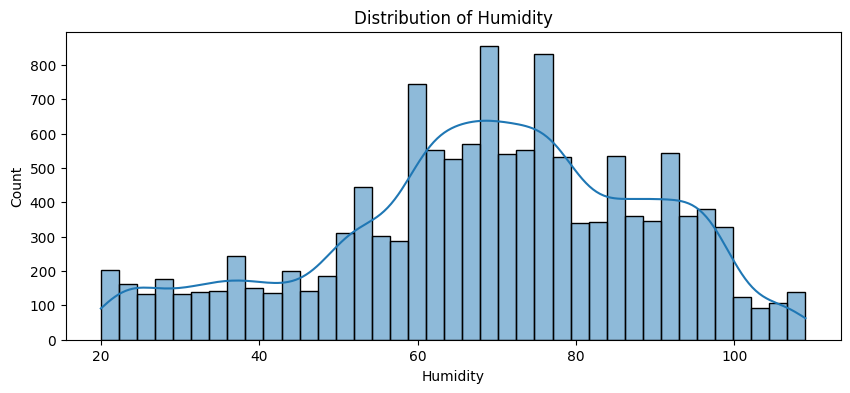

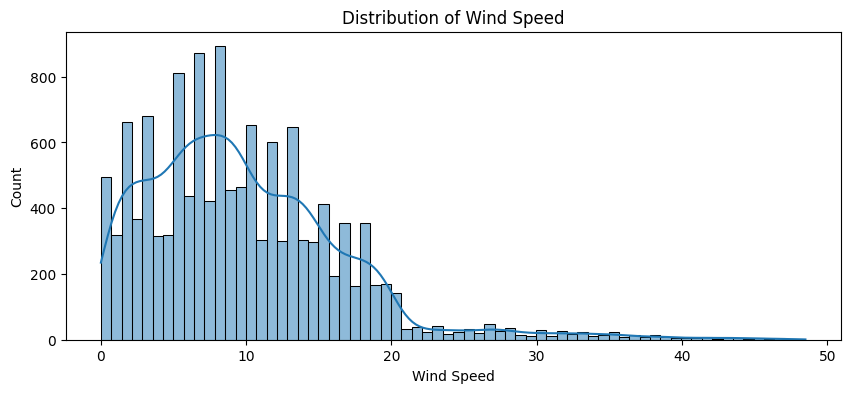

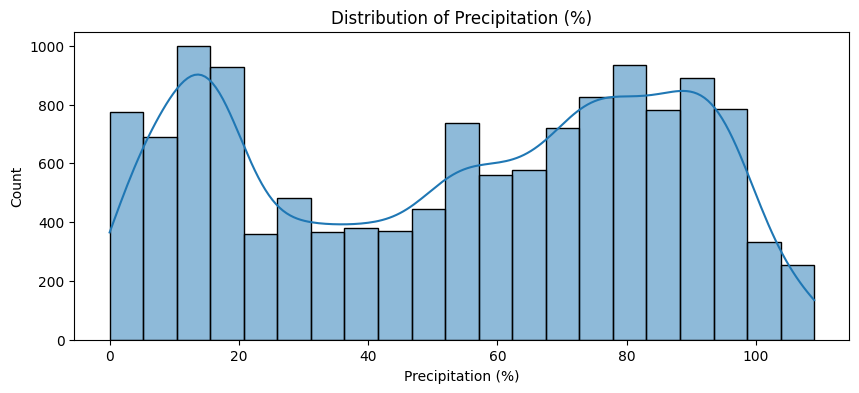

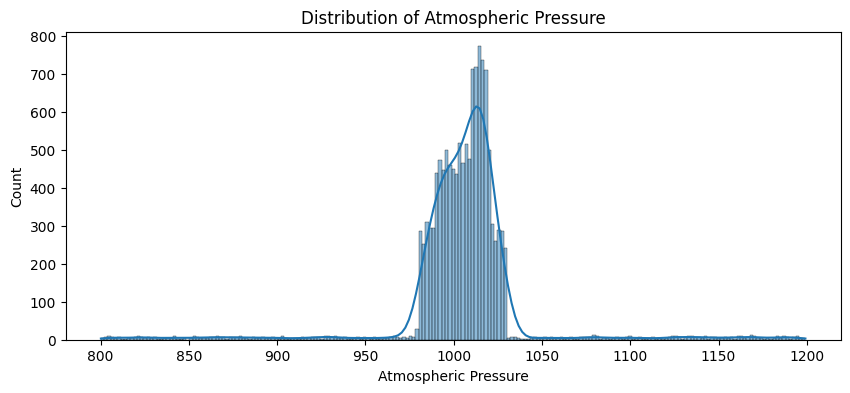

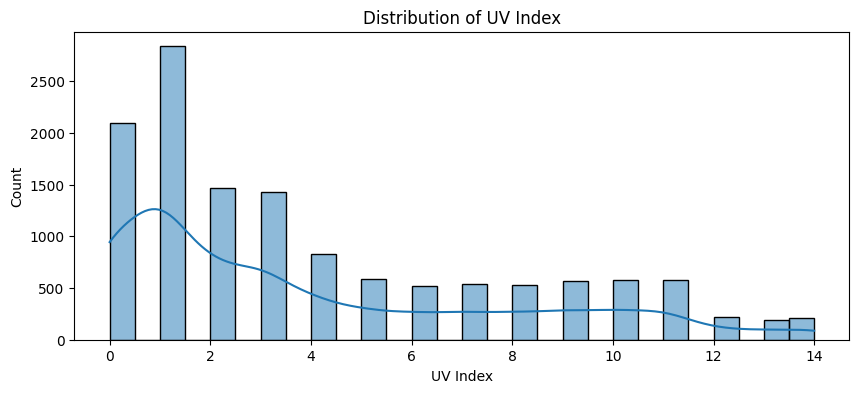

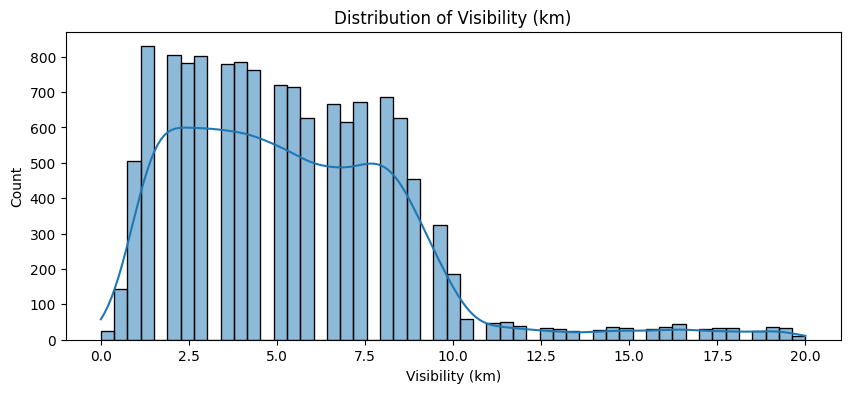

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


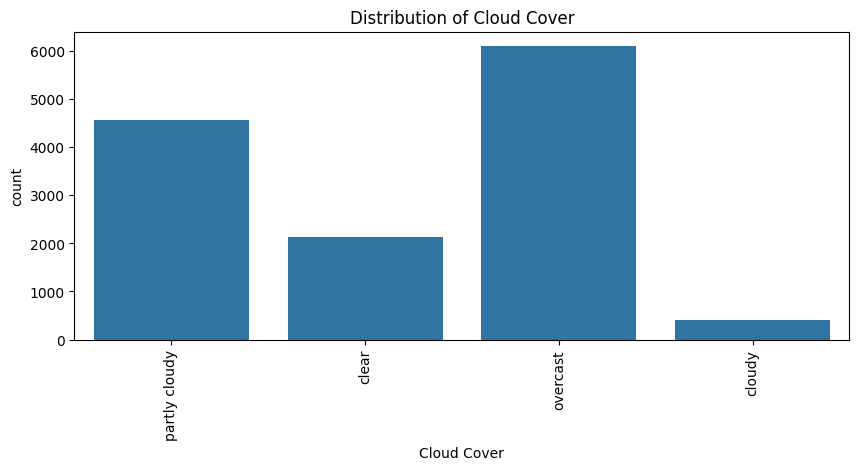

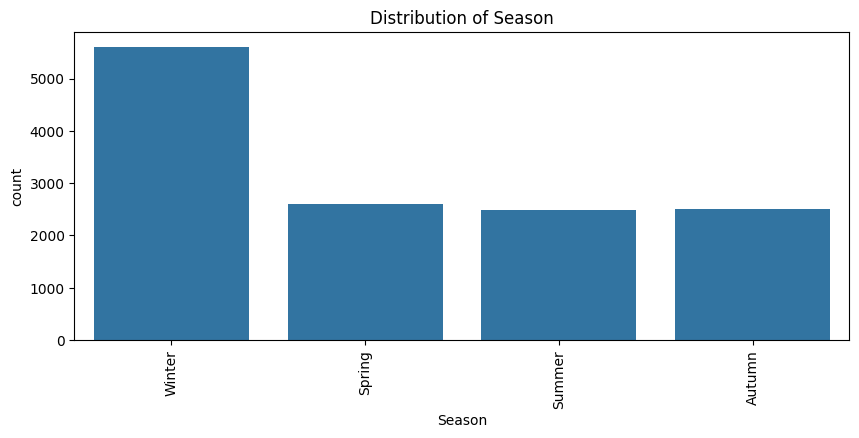

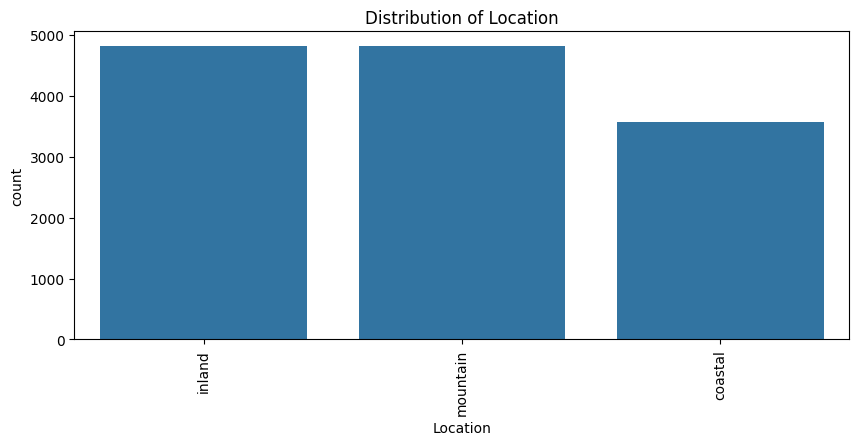

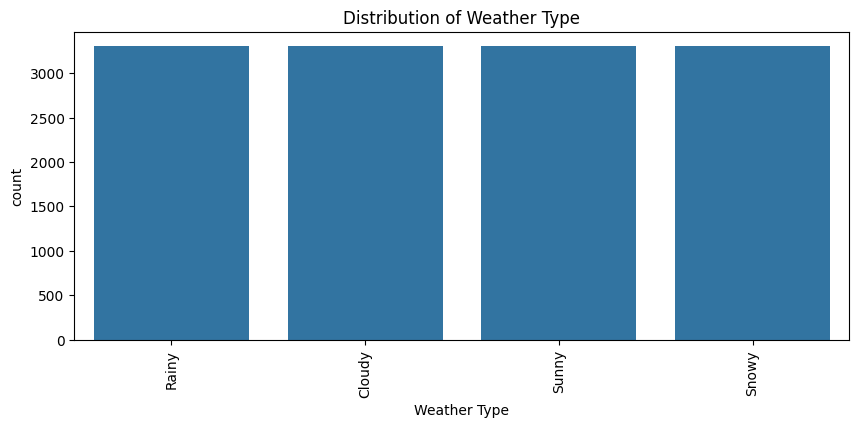

In [3]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


In [4]:
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


There are no missing values!

Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,1
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,2
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,2


Feature selection

In [6]:
#Feature Selection
x= df.drop('Weather Type', axis=1)
y= df['Weather Type']

TRAINING and TESTING

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, x_test, Y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=40)

model= RandomForestClassifier(n_estimators=100, random_state=40)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=40)

In [8]:
pred= model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix 

accuracy= accuracy_score(y_test, pred)

print("Accuracy score is: ", accuracy)


Accuracy score is:  0.915530303030303


In [12]:
print("Confusion MAtrix: ")
print(confusion_matrix(y_test, pred))

Confusion MAtrix:
[[600  33  17  16]
 [ 31 612   6  14]
 [  8  14 608  22]
 [ 20  28  14 597]]
